In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

sns.set_style('darkgrid')

In [6]:
offers = pd.read_csv('./data_now/consolidated.csv', index_col=16)
offers.head(3)

,offer_page_code,offer_title,vacants,type,to_apply,organization_id,specific_requirements,knowledge,salary,responsabilities,specific_location,city_id,end_date,url,current_date,active,careers,careers_id,city,organization
offer_id,,,,,,,,,,,,,,,,,,,,
1,478022,Practicante de Derecho,2.0,PROFESIONAL,Egresado/a de la Carrera profesional universit...,1,NaN,Derechos Humanos.\nDerecho Constitucional.\nDe...,1300.0,NaN,Oficina Defensorial de Ica Dirección: Av. Cute...,1,2025-04-10,https://www.convocatoriasdetrabajo.com/oportun...,2025-03-31 07:01:49,0,['DERECHO'],[240],ICA,DEFENSORIA DEL PUEBLO
2,473123,Practicante de Psicología,NaN,NaN,Egresado o Bachiller (no titulado),2,NaN,Excel intermedio - avanzado.\nTécnicas de recl...,NaN,NaN,Presencial - San Borja -Lima,2,2025-03-31,https://www.convocatoriasdetrabajo.com/oportun...,2025-03-31 07:02:06,0,['PSICOLOGÍA'],[329],LIMA,BANCO DE LA NACIÓN
3,472737,"Practicante de Administración, Contabilidad, I...",2.0,PRE-PROFESIONAL,Estudiante universitario de las carreras de Ad...,3,NaN,NaN,1130.0,Apoyar al seguimiento de cotizaciones a los di...,"Av. Santa Rosa 135, La Perla, Callao.",3,2025-03-31,https://www.convocatoriasdetrabajo.com/oportun...,2025-03-31 07:02:23,0,"['ADMINISTRACIÓN', 'ADMINISTRACIÓN PÚBLICA', '...","[429, 266, 230, 201]",CALLAO,AUTORIDAD PORTUARIA(APN)


In [129]:
offers.iloc[2,:]

offer_page_code                                                     472737
offer_title              Practicante de Administración, Contabilidad, I...
vacants                                                                2.0
type                                                       PRE-PROFESIONAL
to_apply                 Estudiante universitario de las carreras de Ad...
organization_id                                                          3
specific_requirements                                                  NaN
knowledge                                                              NaN
salary                                                              1130.0
responsabilities         Apoyar al seguimiento de cotizaciones a los di...
specific_location                    Av. Santa Rosa 135, La Perla, Callao.
city_id                                                                  3
end_date                                                        2025-03-31
url                      

In [29]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1626 entries, 1 to 1646
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   offer_page_code        1626 non-null   int64  
 1   offer_title            1564 non-null   object 
 2   vacants                1592 non-null   float64
 3   type                   1611 non-null   object 
 4   to_apply               1626 non-null   object 
 5   organization_id        1626 non-null   int64  
 6   specific_requirements  433 non-null    object 
 7   knowledge              836 non-null    object 
 8   salary                 1549 non-null   float64
 9   responsabilities       683 non-null    object 
 10  specific_location      1617 non-null   object 
 11  city_id                1626 non-null   int64  
 12  end_date               1608 non-null   object 
 13  url                    1626 non-null   object 
 14  current_date           1626 non-null   object 
 15  active   

In [30]:
offers.columns.sort_values()

Index(['active', 'careers', 'careers_id', 'city', 'city_id', 'current_date',
       'end_date', 'knowledge', 'offer_page_code', 'offer_title',
       'organization', 'organization_id', 'responsabilities', 'salary',
       'specific_location', 'specific_requirements', 'to_apply', 'type', 'url',
       'vacants'],
      dtype='object')

In [130]:
# Drop irrelevant information for the analysis
columns_to_drop = ['careers_id', 'city_id', 'offer_page_code', 
                   'organization_id', 'specific_requirements', 
                   'knowledge', 'responsabilities', 'specific_location', 
                   'url', 'end_date', 'to_apply', 'offer_title', 'active']

offers_cleaned = offers.drop(columns=columns_to_drop, errors='ignore')

# Change datatype object to datetime for current_date 
offers_cleaned.current_date = pd.to_datetime(offers_cleaned.current_date)

# Get month name from current_date and put as another column
offers_cleaned['month'] = offers_cleaned.current_date.apply(lambda row: row.month_name())
offers_cleaned['month'] = offers_cleaned['month'].map({'March': 'Marzo', 'April': 'Abril', 'May': 'Mayo', 'June': 'Junio'})

# Drop current_date 
offers_cleaned.drop(columns='current_date', inplace=True)


In [131]:
offers_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1626 entries, 1 to 1646
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vacants       1592 non-null   float64
 1   type          1611 non-null   object 
 2   salary        1549 non-null   float64
 3   careers       1626 non-null   object 
 4   city          1626 non-null   object 
 5   organization  1626 non-null   object 
 6   month         1626 non-null   object 
dtypes: float64(2), object(5)
memory usage: 101.6+ KB


In [132]:
offers_cleaned.head()

,vacants,type,salary,careers,city,organization,month
offer_id,,,,,,,
1,2.0,PROFESIONAL,1300.0,['DERECHO'],ICA,DEFENSORIA DEL PUEBLO,Marzo
2,NaN,NaN,NaN,['PSICOLOGÍA'],LIMA,BANCO DE LA NACIÓN,Marzo
3,2.0,PRE-PROFESIONAL,1130.0,"['ADMINISTRACIÓN', 'ADMINISTRACIÓN PÚBLICA', '...",CALLAO,AUTORIDAD PORTUARIA(APN),Marzo
4,1.0,PROFESIONAL,1130.0,"['ADMINISTRACIÓN', 'CONTABILIDAD', 'DERECHO', ...",LIMA,PROVIAS NACIONAL,Marzo
5,1.0,PROFESIONAL,1130.0,"['ADMINISTRACIÓN', 'COMPUTACIÓN E INFORMÁTICA'...",ICA,SUNARP,Marzo


In [84]:
offers_cleaned.type.unique()

array(['PROFESIONAL', nan, 'PRE-PROFESIONAL'], dtype=object)

[Text(0, 0, '1193'), Text(0, 0, '418')]

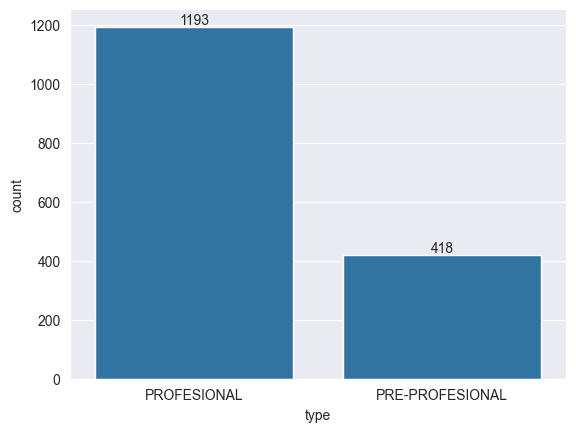

In [113]:
ax = sns.countplot(data=offers_cleaned, x='type')
ax.bar_label(ax.containers[0])

<Axes: ylabel='organization'>

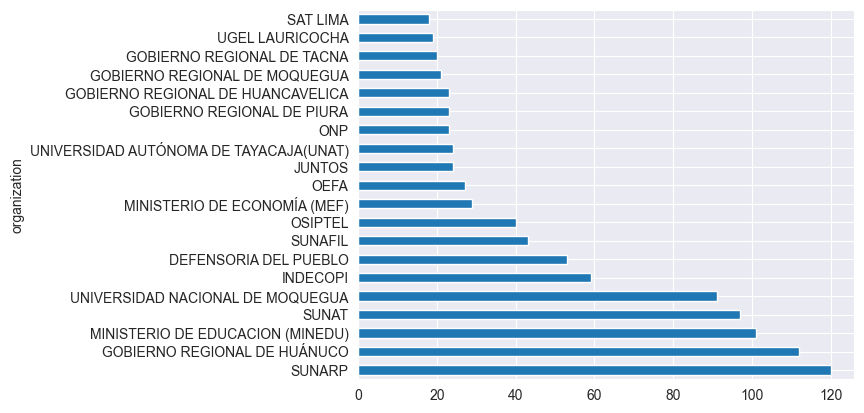

In [125]:
offers_cleaned.organization.value_counts().head(20).plot(kind='barh')

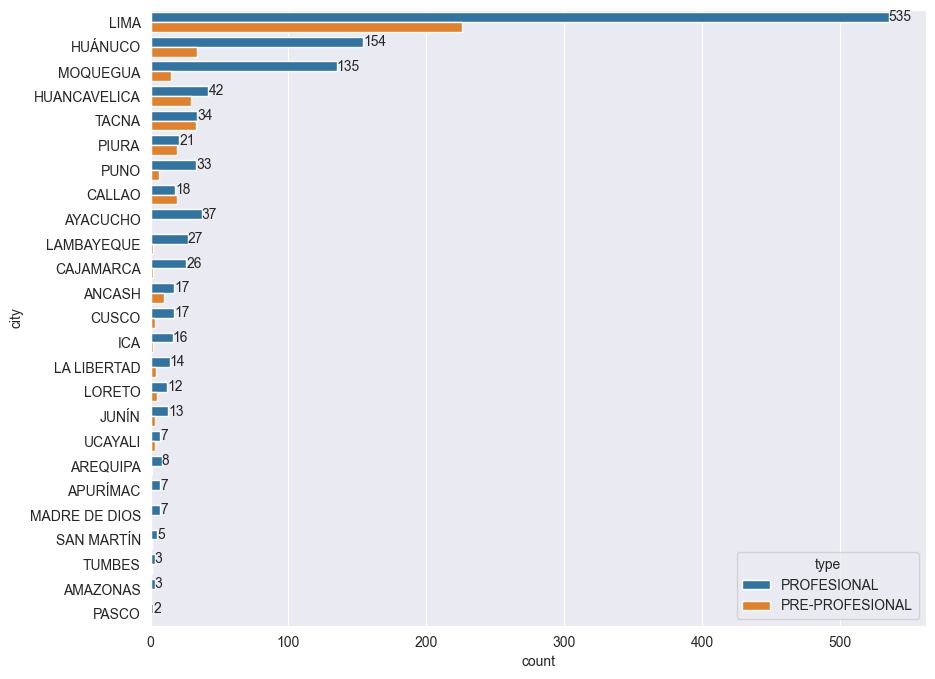

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(data=offers_cleaned, y='city', order=offers_cleaned.city.value_counts().index, hue='type')
ax.bar_label(ax.containers[0])

plt.show()

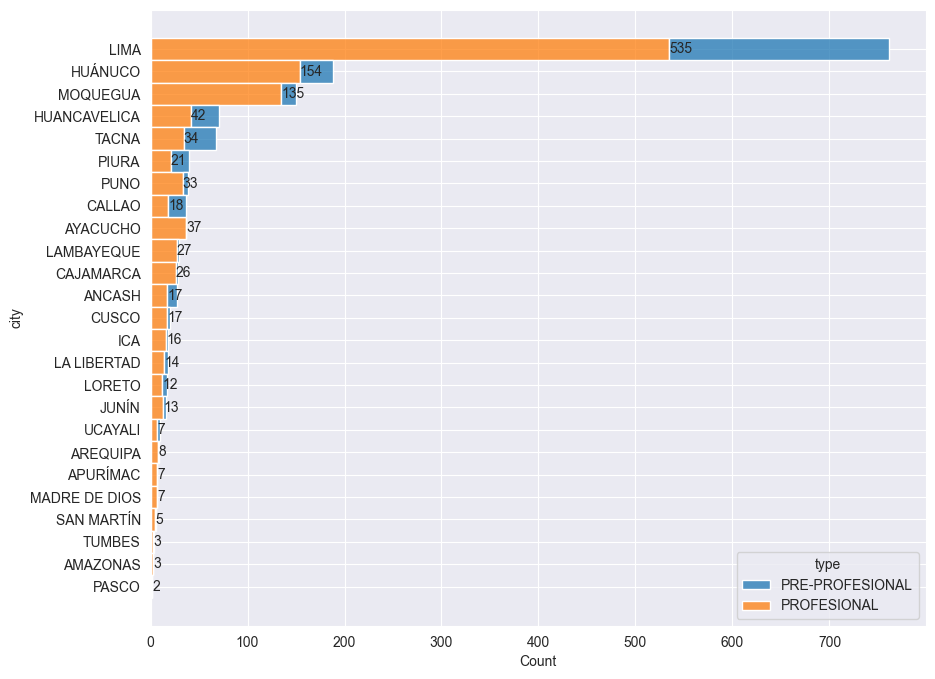

In [140]:
offers_cleaned.city = pd.Categorical(offers_cleaned.city, categories=offers_cleaned.city.value_counts().index, ordered=True)

fig = plt.figure(figsize=(10,8))
ax = sns.histplot(data=offers_cleaned, y='city', hue='type', multiple='stack', hue_order=['PRE-PROFESIONAL', 'PROFESIONAL'])
ax.bar_label(ax.containers[0])

plt.show()

In [1]:
sns.histplot(data=offers_cleaned, x='salary', kde=True, hue='type')

NameError: name 'sns' is not defined

In [96]:
monthly_offers = offers_cleaned.groupby(['month', 'type'])['month'].count()
monthly_offers = offers_cleaned.loc[:, ['month', 'type']]

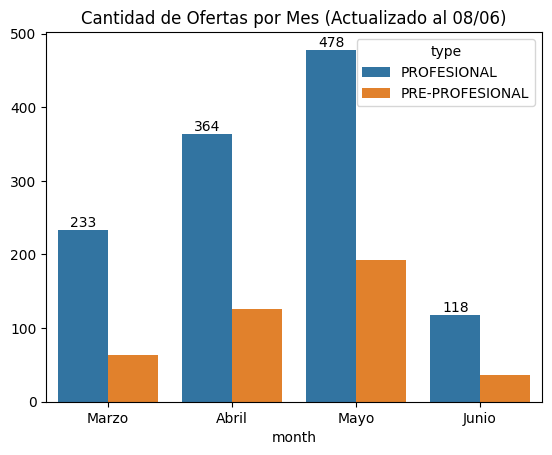

In [98]:
ax = sns.countplot(data=monthly_offers, x='month', hue='type')
ax.bar_label(ax.containers[0])
ax.set_title(f"Cantidad de Ofertas por Mes (Actualizado al {time.strftime('%d/%m')})")
ax.set_ylabel('')
plt.show()

In [23]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [32]:
summary = df.groupby(['island', 'species'])['body_mass_g'].mean()
summary = summary.reset_index()

summary

,island,species,body_mass_g
0,Biscoe,Adelie,3709.659091
1,Biscoe,Gentoo,5076.016260
2,Dream,Adelie,3688.392857
3,Dream,Chinstrap,3733.088235
4,Torgersen,Adelie,3706.372549


<BarContainer object of 5 artists>

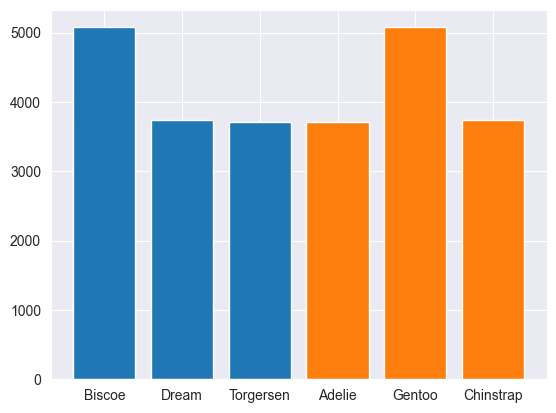

In [42]:
plt.bar(x=summary.island, height=summary.body_mass_g)
plt.bar(x=summary.species, height=summary.body_mass_g)

<BarContainer object of 2 artists>

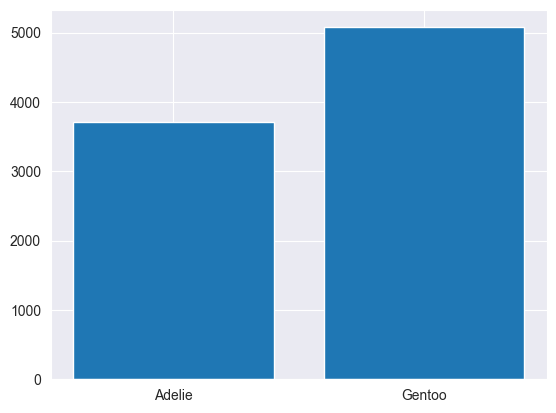

In [51]:
plt.bar(x=summary.loc[summary.island == 'Biscoe', 'species'], height=summary.loc[summary.island == 'Biscoe', 'body_mass_g'])
# plt.bar(x=summary.loc[summary.island == 'Dream', 'species'], height=summary.loc[summary.island == 'Dream', 'body_mass_g'])
# plt.bar(x=summary.loc[summary.island == 'Torgensen', 'species'], height=summary.loc[summary.island == 'Torgensen', 'body_mass_g'])

<Axes: xlabel='island', ylabel='body_mass_g'>

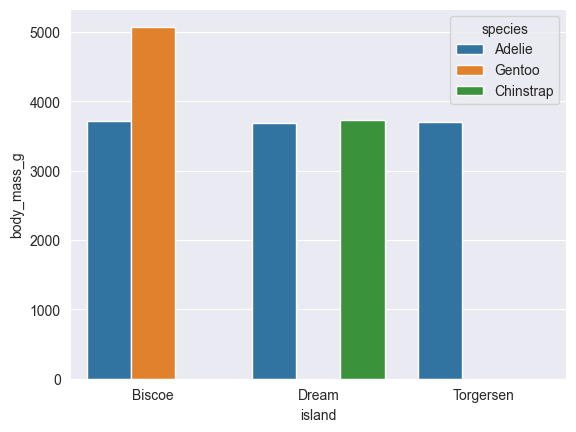

In [34]:
sns.barplot(summary, x='island', y='body_mass_g', hue='species')